In [1]:
from collections import Counter
import pickle
import os
import pandas as pd


def build_dict(corpus):
    # 语料库构建词频
    word_frequency = dict(Counter(corpus))
    word2idx = {word: idx for idx, word in enumerate(word_frequency.keys())}
    word2idx['unk'] = len(word2idx)
    word2idx['pad'] = len(word2idx)
    idx2word = {idx: word for word, idx in word2idx.items()}
    # 字典保存到本地
    with open("dict.txt", 'w', encoding='utf-8') as f:
        f.write(str(word2idx))
    # print(os.path.curdir)
    # pickle.dump(word2idx,"dict.pkl")
    return word2idx, idx2word


def text_vector(text, word2idx, max_length):
    return [word2idx[i] for i in list(text)][0:max_length]

In [2]:
text = pd.read_csv("all_data.csv", sep="\t")
corpus = ''
for item in text.text:
    corpus += item
word2idx, idx2word = build_dict(corpus)

In [3]:
word2idx

{'#': 0,
 '广': 1,
 '州': 2,
 '【': 3,
 '游': 4,
 '行': 5,
 '打': 6,
 '砸': 7,
 '抢': 8,
 '罪': 9,
 '犯': 10,
 '资': 11,
 '料': 12,
 '公': 13,
 '布': 14,
 '！': 15,
 '居': 16,
 '然': 17,
 '是': 18,
 '日': 19,
 '本': 20,
 '间': 21,
 '谍': 22,
 '】': 23,
 ' ': 24,
 '\u200b': 25,
 '政': 26,
 '协': 27,
 '委': 28,
 '员': 29,
 '提': 30,
 '议': 31,
 '恢': 32,
 '复': 33,
 '大': 34,
 '清': 35,
 '王': 36,
 '朝': 37,
 '康': 38,
 '熙': 39,
 '十': 40,
 '世': 41,
 '孙': 42,
 '、': 43,
 '金': 44,
 '新': 45,
 '表': 46,
 '示': 47,
 '，': 48,
 '他': 49,
 '准': 50,
 '备': 51,
 '走': 52,
 '遍': 53,
 '中': 54,
 '国': 55,
 '收': 56,
 '集': 57,
 '1': 58,
 '0': 59,
 '万': 60,
 '人': 61,
 '签': 62,
 '名': 63,
 '向': 64,
 '全': 65,
 '请': 66,
 '愿': 67,
 '君': 68,
 '主': 69,
 '制': 70,
 '。': 71,
 '皇': 72,
 '室': 73,
 '并': 74,
 '算': 75,
 '给': 76,
 '2': 77,
 '多': 78,
 '个': 79,
 '保': 80,
 '留': 81,
 '的': 82,
 '家': 83,
 '写': 84,
 '信': 85,
 '寻': 86,
 '求': 87,
 '支': 88,
 '持': 89,
 '为': 90,
 '彰': 91,
 '显': 92,
 '龙': 93,
 '裔': 94,
 '身': 95,
 '份': 96,
 '其': 97,
 '常': 98,
 '用': 99,
 '品':

In [19]:
def word_to_idx(text,word2idx,max_seq):
    tmp = [word2idx[word] for word in text]
    if len(tmp)<max_seq:
        tmp  += [word2idx['unk']] * (max_seq - len(tmp))
    else:
        tmp = text[0:max_seq]
    return tmp

In [20]:
word_to_idx(text["text"][0],word2idx,50)

[0,
 1,
 2,
 0,
 3,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 15,
 23,
 24,
 25,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409,
 4409]

In [15]:
[word2idx['unk']] * 10

[4409, 4409, 4409, 4409, 4409, 4409, 4409, 4409, 4409, 4409]

In [21]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

|          | 0/? [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw


|          | 0/? [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw


|          | 0/? [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw


|          | 0/? [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw
Processing...


G:\Program Files (x86)\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [27]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

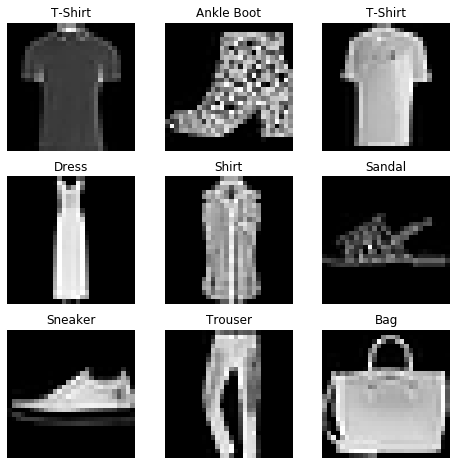

In [22]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [24]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

In [25]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


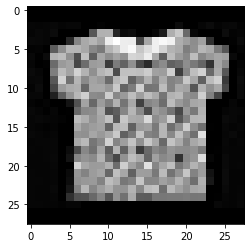

Label: 0


In [26]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")